<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/dp0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
###
###
!pip install tensorflow-gpu==2.0.0-beta1
###


###
###
#from __future__ import absolute_import, division, print_function, unicode_literals
#
#try:
#  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
###



import tensorflow as tf
print(tf.__version__)



from tensorflow import keras
print(keras.__version__)

import matplotlib.pyplot as plt

2.0.0-beta1
2.2.4-tf


In [0]:
# keras에서 데이터 불러온다
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

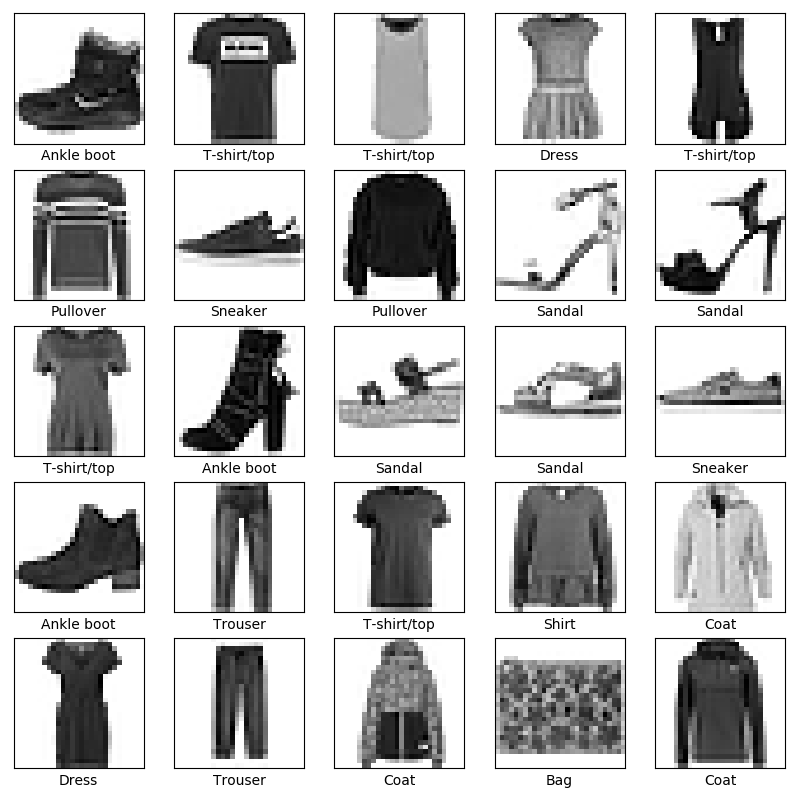

In [0]:
# train 앞 25개를 보자
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10), dpi=100)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.savefig("result.png", c="a")
plt.show()

In [0]:
# nomalize

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [31]:
import numpy as np
import collections

train_images_sel, train_labels_sel = np.empty((0, 28*28)), np.empty((0))

print(train_images_sel.shape)
print(train_labels_sel.shape)
print('\n')

for i in range(10):
    chosen_idx = np.random.choice(np.where(train_labels == i)[0], replace=False, size=1000)
    train_images_sel = np.concatenate((train_images_sel, train_images[chosen_idx].reshape(-1, 28*28)))
    train_labels_sel = np.concatenate((train_labels_sel, train_labels[chosen_idx]))

print(train_images_sel.shape)
print(train_labels_sel.shape)
print('\n')


train_labels_sel_occurence = collections.Counter(train_labels_sel)

print('number of samples per class:\n')

for i in range(10): 
  print(class_names[i],' \t: ', train_labels_sel_occurence[i])


(0, 784)
(0,)


(10000, 784)
(10000,)


number of samples per class:

T-shirt/top  	:  1000
Trouser  	:  1000
Pullover  	:  1000
Dress  	:  1000
Coat  	:  1000
Sandal  	:  1000
Shirt  	:  1000
Sneaker  	:  1000
Bag  	:  1000
Ankle boot  	:  1000


In [32]:
# symmetric properties

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score, mutual_info_score

y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(train_images_sel)

print(normalized_mutual_info_score(y_pred, train_labels_sel))

print(normalized_mutual_info_score(train_labels_sel, y_pred))


print(adjusted_mutual_info_score(y_pred, train_labels_sel))

print(adjusted_mutual_info_score(train_labels_sel, y_pred))



0.5344865144112486
0.5344865144112486
0.5235841985955082
0.523584198595504


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

In [35]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.images.shape)

(1797, 8, 8)


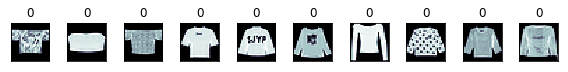

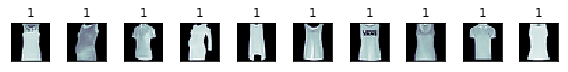

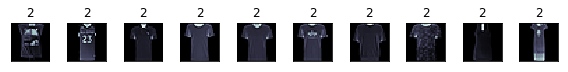

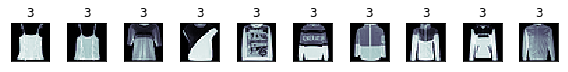

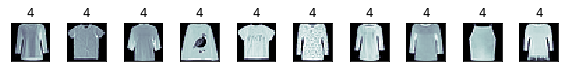

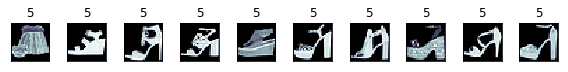

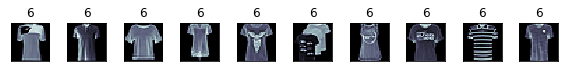

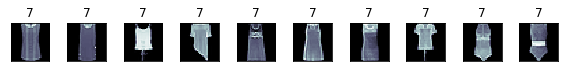

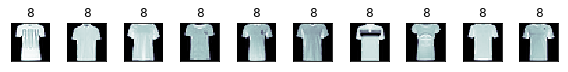

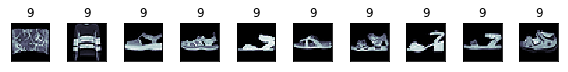

In [39]:
def show_class(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i].reshape(28, 28), cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_class(images, y_pred)
    

for i in range(10):
    show_cluster(train_images_sel, y_pred, i)